In [1]:
## Importing the necessary packages
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
## Importing the dataset into the working environment
df = pd.read_csv('InstagramThreads_Reviews-Data-1-2_2.csv')

In [3]:
## Viewing the top five observations
df.head()

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,7/8/2023 14:18
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,7/19/2023 20:52
2,Google Play,"For a brand new app, it's very well optimized....",3,7/6/2023 23:03
3,Google Play,"Great app with a lot of potential! However, th...",3,7/10/2023 0:53
4,Google Play,"The app is good, but it needs a lot of functio...",3,7/6/2023 16:57


In [33]:
## Exploring the data with descriptive statistics
df.describe()

,rating,sentiment,review_length,word_count
count,32910.000000,32910.000000,32910.000000,32910.000000
mean,3.398481,0.201328,65.728775,12.265451
std,1.751480,0.411339,104.898107,19.041790
min,1.000000,-0.992100,1.000000,1.000000
25%,1.000000,0.000000,11.000000,2.000000
50%,4.000000,0.144000,28.000000,5.000000
75%,5.000000,0.493900,79.000000,15.000000
max,5.000000,0.999400,5947.000000,999.000000


The dataset contains 32,910 reviews with an average rating of approximately 3.4, indicating a moderate level of user satisfaction. The standard deviation of about 1.75 suggests significant variability in user experiences, with ratings ranging from a minimum of 1 to a maximum of 5. The 25th percentile shows that 25% of the ratings are at or below 1, indicating a notable portion of very dissatisfied users. The median rating is 4, suggesting that half of the reviews have a rating of 4 or above, reflecting a generally positive sentiment among a significant portion of users. The 75th percentile reveals that 75% of the ratings are at or below 5, with 25% of the ratings being the maximum value of 5, showing that a substantial portion of users gave the highest possible rating.

This highlights a central tendency towards positive experiences, with the median being higher than the mean. This suggests that while many users are very satisfied with the app, there are also considerable numbers of low ratings that pull the mean down. The high standard deviation and the wide range of ratings indicate diverse user experiences, with both highly satisfied (rating of 5) and very dissatisfied users (rating of 1).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32910 non-null  object
 1   review_description  32910 non-null  object
 2   rating              32910 non-null  int64 
 3   review_date         32910 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


In [6]:
## Grouping the data by rating
df.groupby('source')['rating'].mean()

source
App Store      2.813258
Google Play    3.449521
Name: rating, dtype: float64

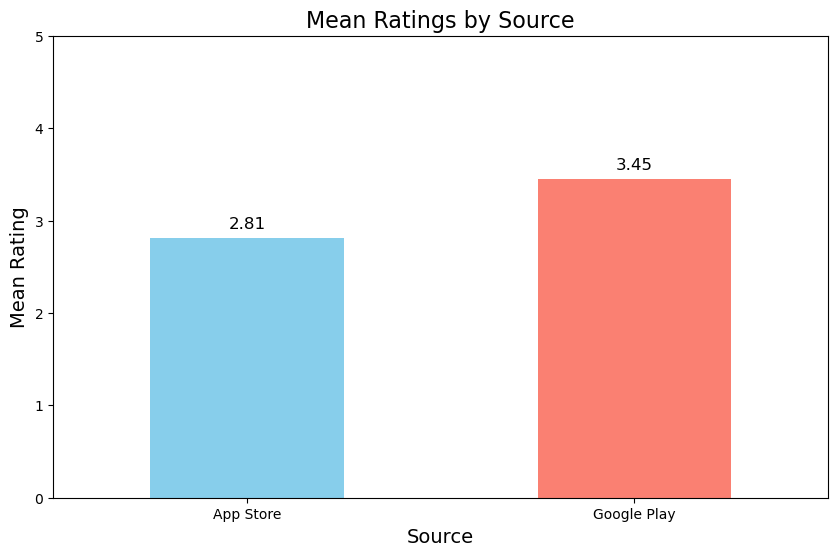

In [43]:
## Calculating the oversall mean by source
mean_ratings = df.groupby('source')['rating'].mean()

# Plotting the mean ratings
plt.figure(figsize=(10, 6))
mean_ratings.plot(kind='bar', color=['skyblue', 'salmon'])

# Adding titles and labels
plt.title('Mean Ratings by Source', fontsize=16)
plt.xlabel('Source', fontsize=14)
plt.ylabel('Mean Rating', fontsize=14)
plt.xticks(rotation=0)
plt.ylim(0, 5)

for index, value in enumerate(mean_ratings):
    plt.text(index, value + 0.1, round(value, 2), ha='center', fontsize=12)


plt.show()

the results reveal a notable difference in user satisfaction between App Store and Google Play users. The mean rating for App Store users is approximately 2.81, while the mean rating for Google Play users is higher at around 3.45.

This analysis indicates that users who downloaded the app from the App Store are generally less satisfied compared to those who downloaded it from Google Play. The lower mean rating for the App Store suggests potential issues specific to the iOS version of the app, such as performance problems, compatibility issues, or user experience challenges. In contrast, the higher mean rating for Google Play implies that Android users are more satisfied, possibly due to better optimization, stability, or user experience in the Android version.

In [7]:
source_counts = df['source'].value_counts()
print(source_counts)

Google Play    30270
App Store       2640
Name: source, dtype: int64


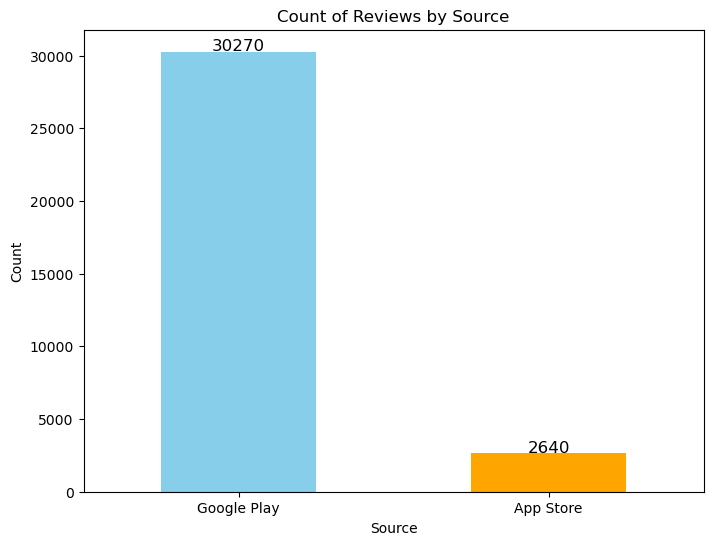

In [44]:
plt.figure(figsize =(8,6))
source_counts.plot(kind='bar', color =['skyblue','orange'])
plt.title('Count of Reviews by Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=0)  

for index, value in enumerate(source_counts):
    plt.text(index, value + 100, str(value), ha='center', fontsize=12)

plt.show()

The value counts for the source column show a significant disparity between the number of reviews from Google Play and the App Store. Specifically, there are 30,270 reviews from Google Play compared to 2,640 reviews from the App Store.

This disparity suggests that the majority of users who have provided reviews about Instagram Threads have downloaded the app from Google Play rather than the App Store. Such a difference in review volume between platforms can influence the representativeness of feedback. However, this indicates that the insights drawn from Google Play reviews may be more extensive and diverse, potentially providing a broader perspective on user experiences compared to the App Store reviews, which are comparatively fewer.

The combination of the higher volume of reviews on Google Play (30,270) compared to the App Store (2,640) along with the corresponding mean ratings reveals important insights about user perceptions of the Instagram Threads app across different platforms.

Google Play's significantly larger review volume suggests that insights derived from these reviews are more broadly representative of the app's user base on Android devices. The higher average rating of approximately 3.45 on Google Play indicates a generally more positive reception among Android users. This suggests that the app may be better optimized or more aligned with user expectations on the Android platform.

In contrast, the lower average rating of about 2.81 on the App Store points to challenges or areas of dissatisfaction specific to iOS users. Addressing these platform-specific issues, such as performance optimizations or user interface enhancements tailored for iOS devices, could help improve user satisfaction and overall app performance on Apple devices.

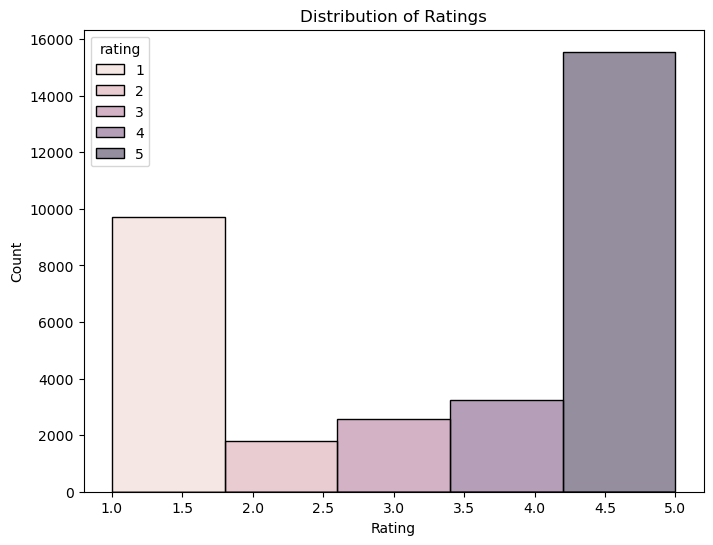

In [9]:
## Rate distribution
plt.figure(figsize=(8, 6))
sns.histplot(df, x= 'rating', bins=5, kde=False, hue ='rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [45]:
rating_counts = df['rating'].value_counts().sort_index()

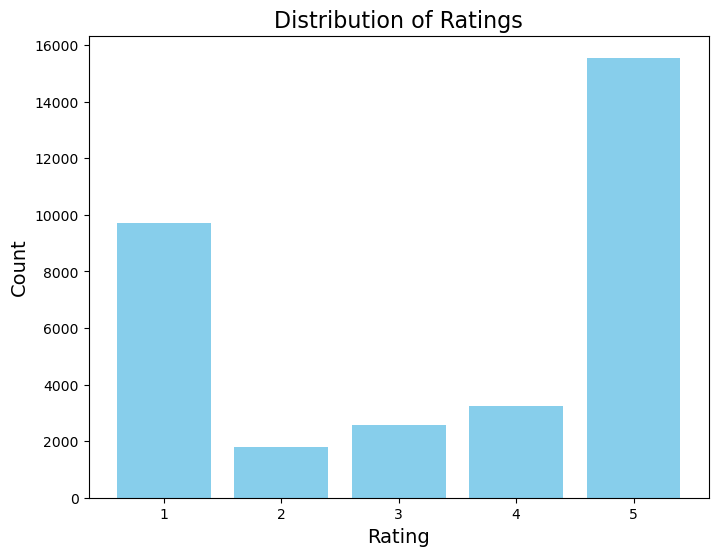

In [49]:
plt.figure(figsize=(8, 6))
plt.bar(rating_counts.index, rating_counts.values, color='skyblue')

# Adding title and labels
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)

# Display the plot
plt.show()

In [26]:
df['review_length'] = df['review_description'].apply(len)

C:\Users\francis mawutor\AppData\Local\Temp\ipykernel_10768\576070709.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


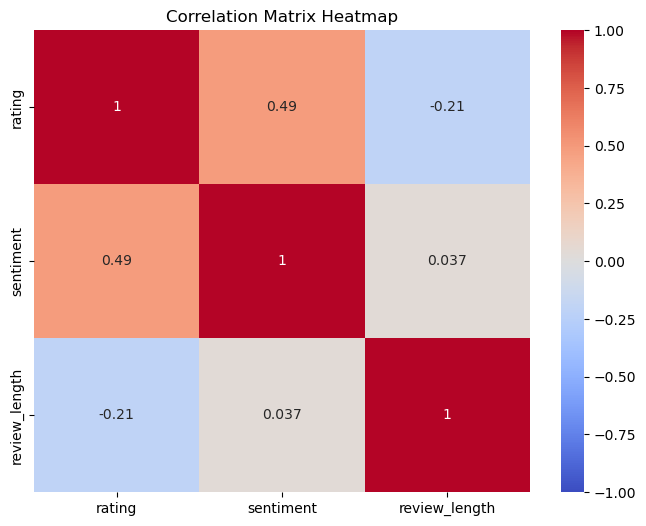

In [28]:
corr_matrix = df.corr()

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [37]:
print(df.corr())

                 rating  sentiment  review_length  word_count
rating         1.000000   0.490436      -0.210682   -0.208602
sentiment      0.490436   1.000000       0.036562    0.042383
review_length -0.210682   0.036562       1.000000    0.993811
word_count    -0.208602   0.042383       0.993811    1.000000


C:\Users\francis mawutor\AppData\Local\Temp\ipykernel_10768\4212406737.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


Rating vs Sentiment: There exists a moderate positive correlation of approximately 0.49 between ratings and sentiment. This indicates that reviews with more positive sentiment tend to correlate with higher ratings. This suggests that users are more likely to rate an app positively when they express positive sentiments in their reviews.

Rating vs Review Length: There is a weak negative correlation of around -0.21 between rating and review length. This suggests that shorter reviews tend to slightly correlate with higher ratings, while longer reviews may correlate with slightly lower ratings. However, this negative correlation is not very strong, implying that the impact of review length on ratings is relatively minor.

Sentiment vs Review Length: The correlation between sentiment and review length is very weak, approximately 0.04. This indicates that there is a slight tendency for longer reviews to have slightly more positive sentiments, but the correlation is too weak to draw strong conclusions.

In [10]:
df.dropna(subset=['review_description'], inplace=True)


In [11]:
df['review_date'] = pd.to_datetime(df['review_date'])


In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

In [21]:
sid = SentimentIntensityAnalyzer()
df['sentiment'] = df['review_description'].apply(lambda x: sid.polarity_scores(x)['compound'])

Text(0.5, 1.0, 'Sentiment Analysis of Reviews')

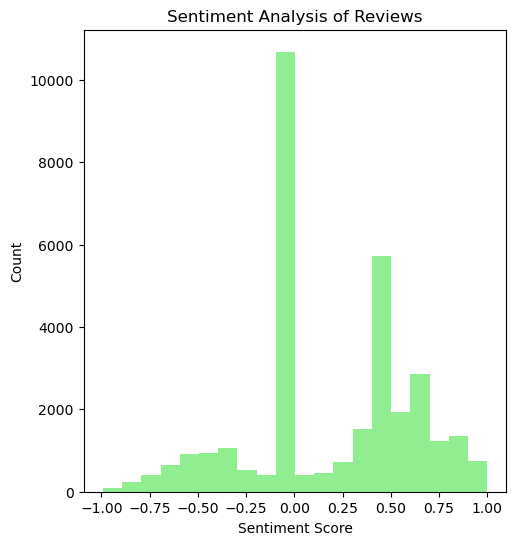

In [23]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.hist(df['sentiment'], bins=20, color='lightgreen')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.title('Sentiment Analysis of Reviews')

The prevalence of sentiment scores around 0.00 suggests that many users express neutral opinions about the app. These reviews typically contain factual statements or opinions without strong emotional leanings, indicating a middle ground in user satisfaction. This neutrality could stem from various factors such as the app meeting basic expectations but not necessarily exceeding them.

Conversely, higher positive scores (greater than 0) reflect varying degrees of satisfaction and approval among users. Scores closer to +1 signify enthusiastic endorsements of the app's features, usability, or overall experience. Such positive sentiments highlight strengths that resonate well with users, potentially driving positive word-of-mouth and user retention.

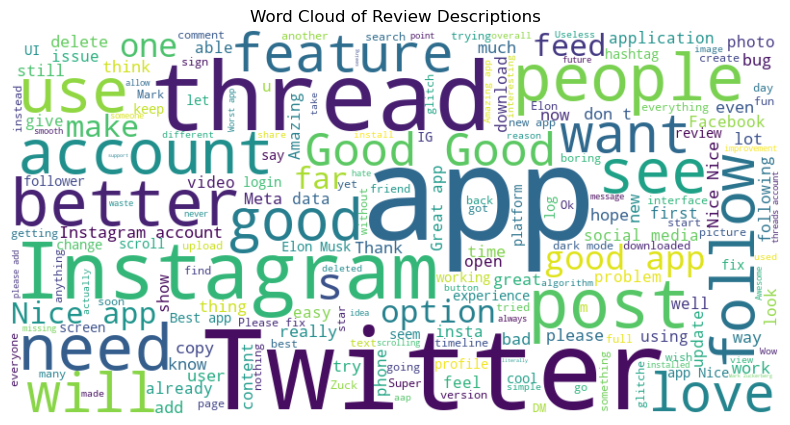

In [24]:
text = ' '.join(df['review_description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Descriptions')
plt.show()